# Advanced Numerical Analysis

## Exercise 24

*Given the initial value problem*
$$\begin{cases}
y'' = -y \\
y(0) = 1,\ y'(0) = 0
\end{cases}$$

*compute an approximation to* $y(0.4)$ *with constant step size* $h := 0.1$ *by*

$\textrm{(i)} \quad$ *rewriting the differential equation as a system of first order differential equations and
using Euler’s method;*

The system of above is equivalent to the following first order system for $y = (y_1, y_2)^\top.$

$$\begin{cases}
y' = \big(\begin{smallmatrix} 0 & 1 \\ -1 & 0 \end{smallmatrix}\big) y \\
y(0) = (1,0)^\top
\end{cases}$$

In [13]:
t0 = 0;
tN = 0.4;
h = 0.1;
t = t0 : h : tN;

y0 = [1; 0];

function y_pp = f(t, y, y_prime)
    % function of y'' = -y
    y_pp = -y;
endfunction

function y_prime = F(t, y)
    % function of system y' = A y
    y_prime = [[0, 1]; [-1, 0]] * y;
endfunction

In [3]:
function y = Euler_method(F, y0, t)
    % returns array of approximated function values of ODE y' = F(t, y)
    %
    % F .... pointer to function of first order system
    % y0 ... initial condition as column vector
    % t .... discretized interval
    
    n = length(t);
    m = length(y0);
    y = zeros(n, m);
    y(1,:) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        y(k+1,:) = y(k,:) + h * F(t(k), y(k,:)')';
    endfor
endfunction

In [27]:
approximation1 = Euler_method(@F, y0, t)(:,1);
printf("y(0.4) is approximately %f by Euler's method.", approximation1(end))

y(0.4) is approximately 0.940100 by Euler's method.

$\textrm{(ii)} \quad$ *using the following rules for solving* $y''(t) = F(t, y(t))$ *derived from a truncated Taylor expansion for* $i = 0, \dots, 3:$

$$\begin{align*}
y^0 &:= y(0), \\
\dot{y}^0 &:= y'(0), \\
y^{j+1} &:= y^j + h \dot{y}^j + \frac{h^2}{2} F(t_j, y^j), \\
\dot{y}^{j+1} &:= \dot{y}^j + h F(t_j, y^j)
\end{align*}$$

*Interpret the rule geometrically.*

In [5]:
function y = second_order_method(F, y0, t)
    % returns array of approximated function values of ODE y'' = F(t, y, y')
    %
    % F .... pointer to function of second order system
    % y0 ... initial condition of y and y' as an 2 x m array
    % t .... discretized interval
    
    n = length(t);
    m = length(y0(1,:));
    
    y = zeros(n, m);
    y(1,:) = y0(1,:);
    
    y_prime = zeros(n, m);
    y_prime(1,:) = y0(2,:);
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        y(k+1,:) = y(k,:) + h * y_prime(k,:) + h^2 / 2 * F(t(k), y(k,:)', y_prime(k,:)')';
        y_prime(k+1,:) = y_prime(k,:) + h * F(t(k), y(k,:)', y_prime(k,:)')';
    endfor
endfunction

In [26]:
approximation2 = second_order_method(@f, y0, t);
printf("y(0.4) is approximately %f by the truncated Taylor expansion.", approximation2(end))

y(0.4) is approximately 0.920649 by the truncated Taylor expansion.

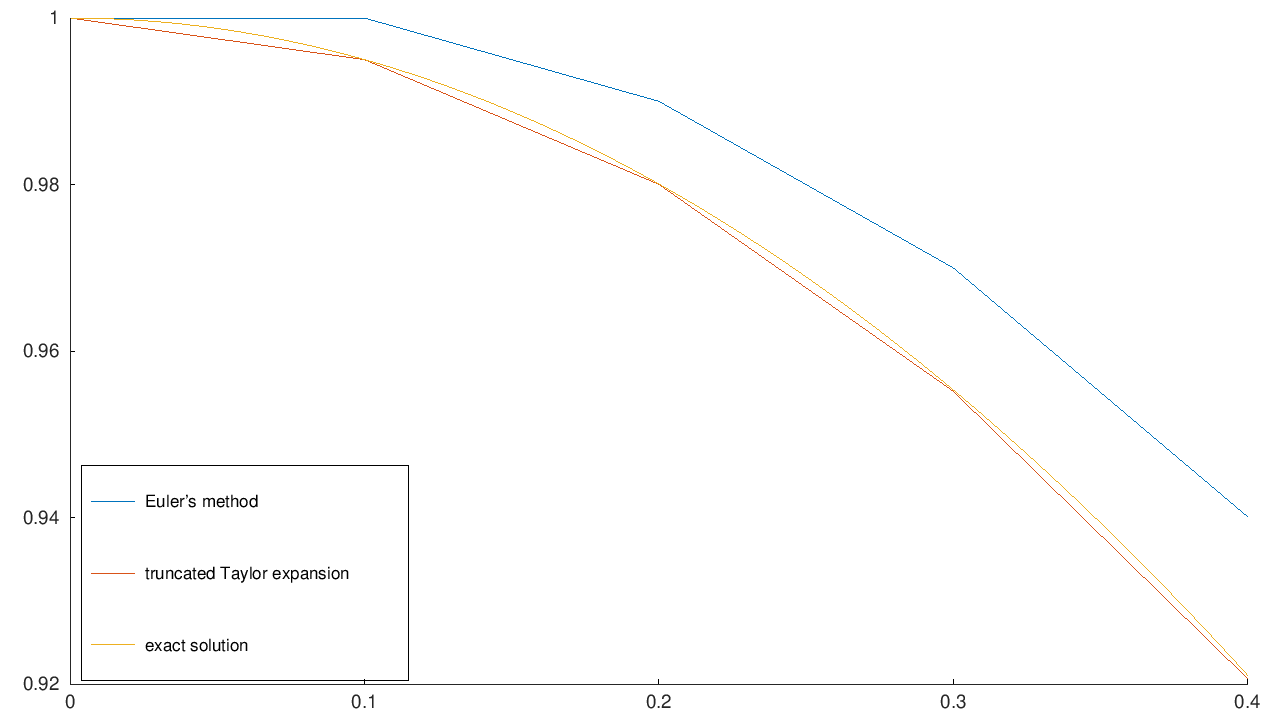

In [17]:
%plot -s 1280,720
hold on
plot(t, approximation1)
plot(t, approximation2)
plot([0:0.001:0.4], cos([0:0.001:0.4]))
legend("Euler's method", "truncated Taylor expansion", "exact solution", "location", "southwest");